<a href="https://colab.research.google.com/github/kashishthakur26/Computer-vision-learning/blob/main/Autoencoders_for_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense , Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__


'2.12.0'

## Loading the dataset

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
np.random.randint(0,59999)

1525

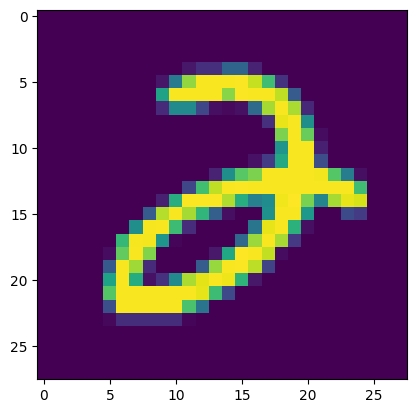

In [ ]:
i = np.random.randint(0 , 59999)
plt.imshow(x_train[i])

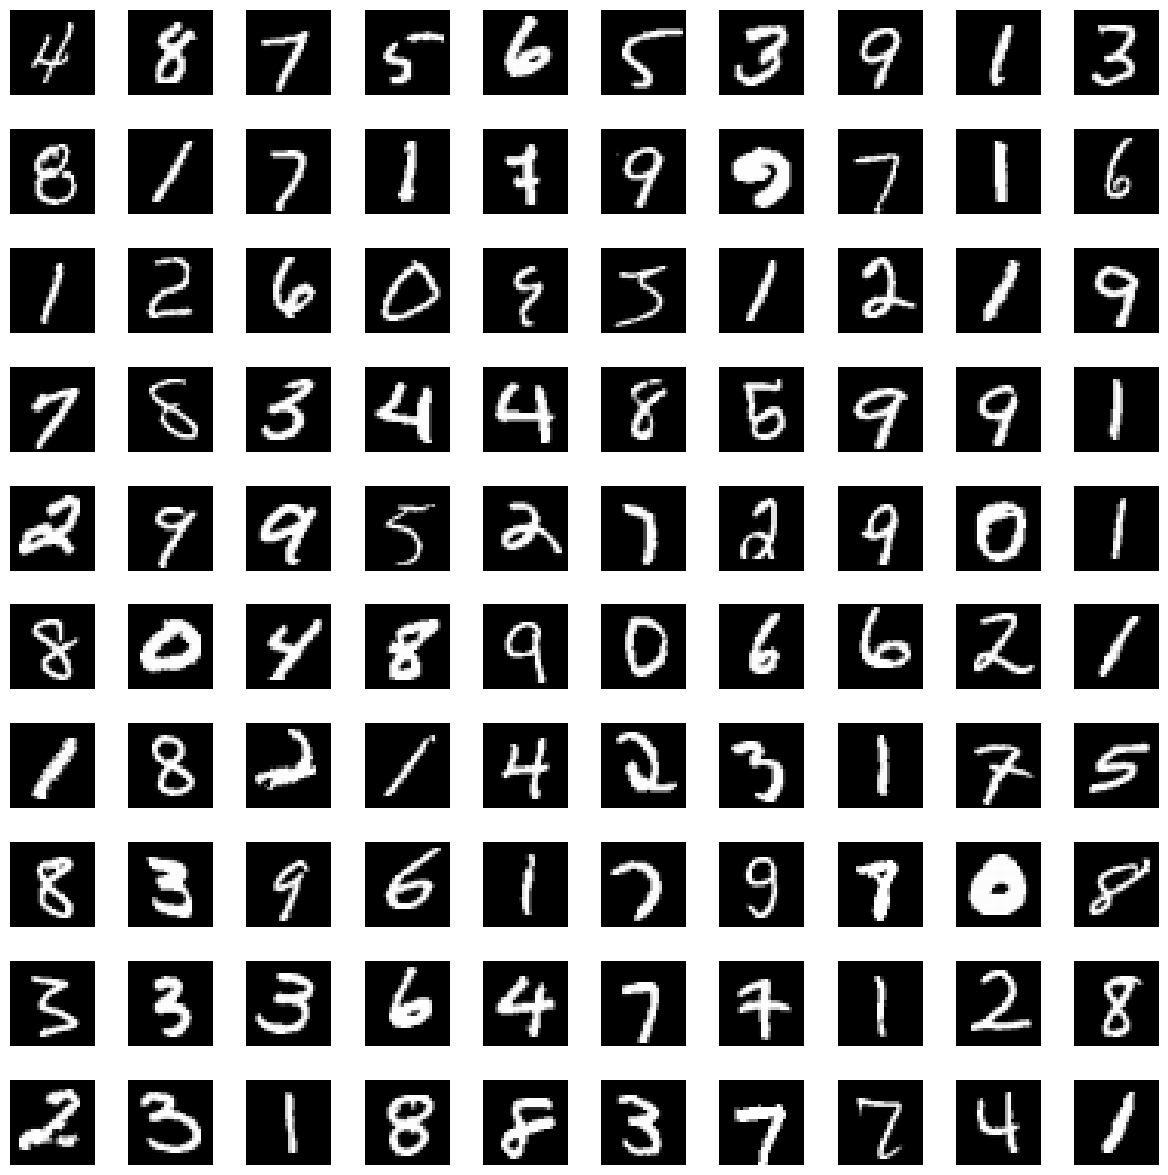

In [ ]:
width = 10
height = 10

fig , axes = plt.subplots(height , width , figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0 , width * height):
  index = np.random.randint(0,59999)
  axes[i].imshow(x_train[index] , cmap='gray')
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## preprocessing the image

In [ ]:
x_train[0].min(), x_train[0].max()


(0, 255)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_train.shape

(60000, 784)

In [ ]:
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_test.shape

(10000, 28, 28)

## Building and training the autoencoder

In [ ]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [ ]:
autoencoder.compile(optimizer='Adam' ,loss='binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
# autoencoder.fit(x_train , x_train , epochs=50)

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


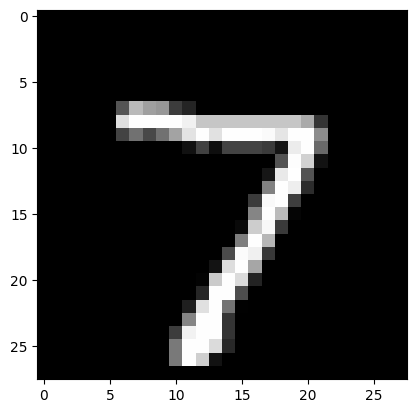

In [ ]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray');

In [ ]:
x_test[0].shape

(28, 28)

In [ ]:
x_test[0].reshape(1, -1).shape

(1, 784)

In [ ]:
encoded_image = encoder.predict(x_test[0].reshape(1,-1))

1/1 [==============================] - 3s 3s/step


In [ ]:
encoded_image, encoded_image.shape

(array([[0.19584262, 0.17776833, 0.03678472, 0.2361587 , 0.        ,
         0.12611535, 0.04796484, 0.        , 0.19120444, 0.        ,
         0.        , 0.        , 0.        , 0.26887476, 0.        ,
         0.03348426, 0.        , 0.        , 0.        , 0.        ,
         0.23025791, 0.12552096, 0.        , 0.09686001, 0.        ,
         0.04855266, 0.        , 0.30333242, 0.02222022, 0.18437505,
         0.00820214, 0.11713357]], dtype=float32),
 (1, 32))

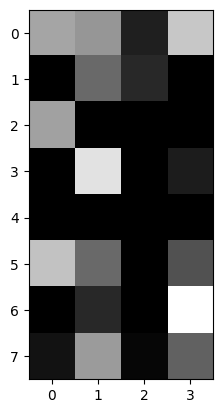

In [ ]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

## Decoding the images

In [ ]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 52ms/step


In [ ]:
decoded_image.shape

(1, 784)

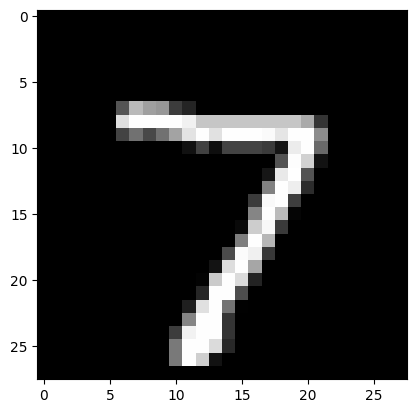

In [ ]:
plt.imshow(x_test[0].reshape(28,28), cmap = 'gray');

## ENCODING AN DECODING THE TEST IMAGES

In [ ]:
x_test.shape[0]

10000

1/1 [==============================] - 0s 16ms/step


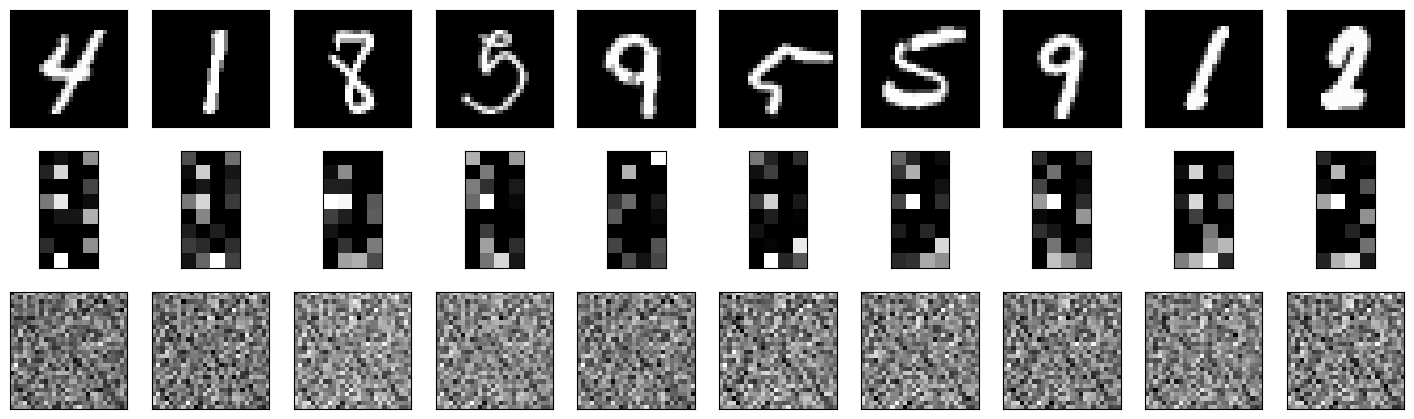

In [ ]:
n_images = 10
test_images = np.random.randint(0, x_test.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  encoded_image = encoder.predict(x_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

## Convolution autoencoders

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

## Visualizing the images

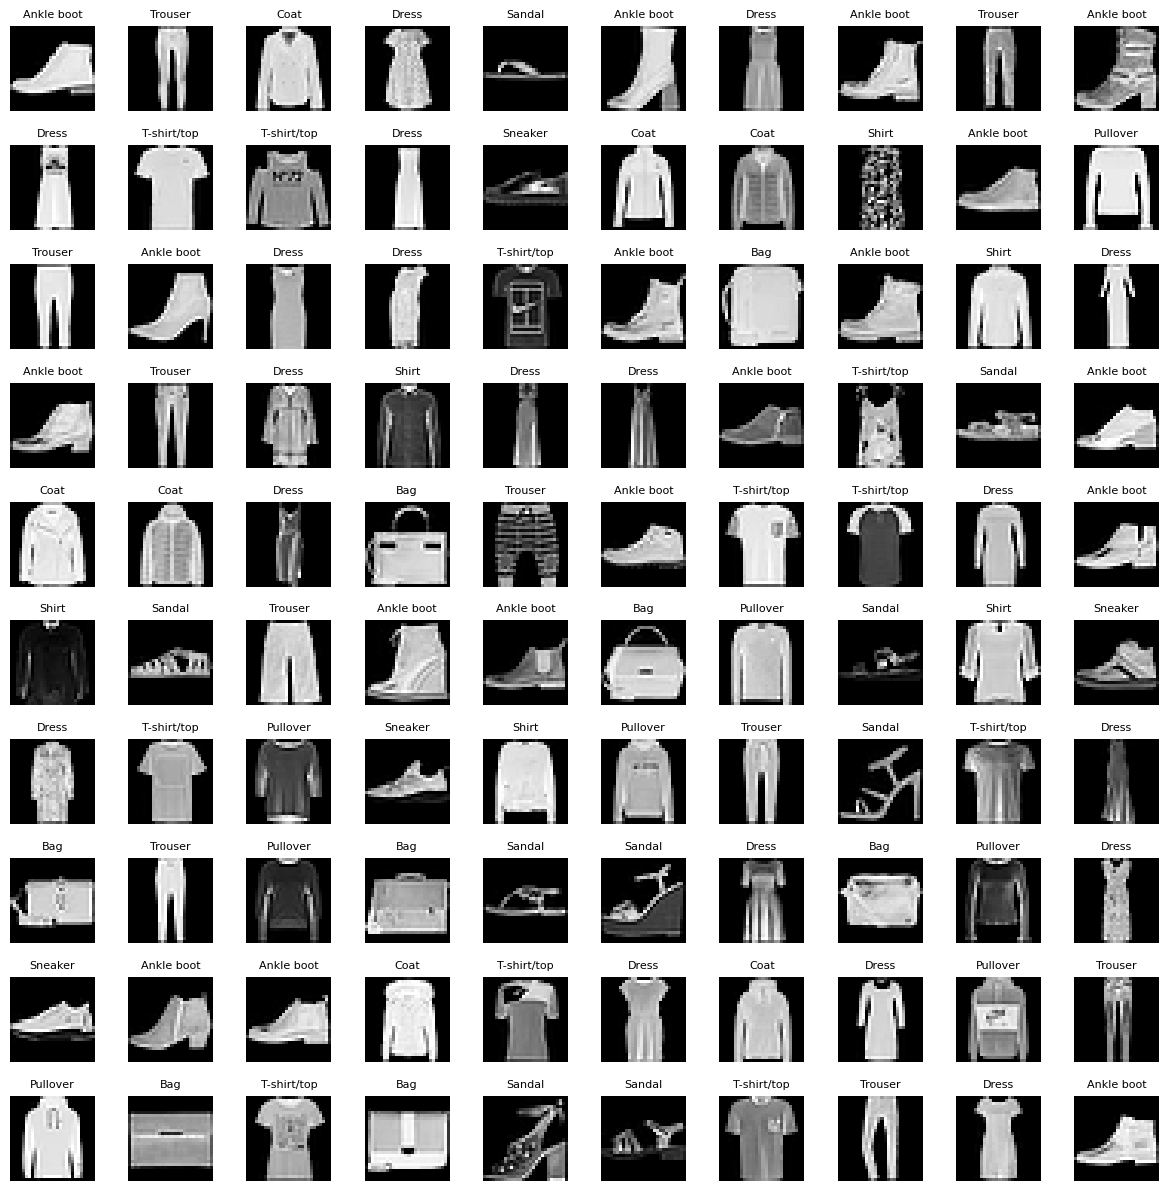

In [8]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(classes[y_train[index]], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Pre-processing the images

In [9]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train = X_train.reshape(len(X_train) , 28,28,1)
X_test = X_test.reshape(len(X_test) , 28,28,1)

In [12]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding = 'same', strides=(2,2)))
autoencoder.add(Flatten())

# Decoder
autoencoder.add(Reshape((4,4,8)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [18]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2704 - accuracy: 0.5087
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2702 - accuracy: 0.5087
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2702 - accuracy: 0.5087
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2701 - accuracy: 0.5087
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2700 - accuracy: 0.5087
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2699 - accuracy: 0.5087
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2699 - accuracy: 0.5087
Epoch 8/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2698 - accuracy: 0.5087
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2698 - accuracy: 0.5087
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - los

In [20]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584   

In [21]:
coded_test_images = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

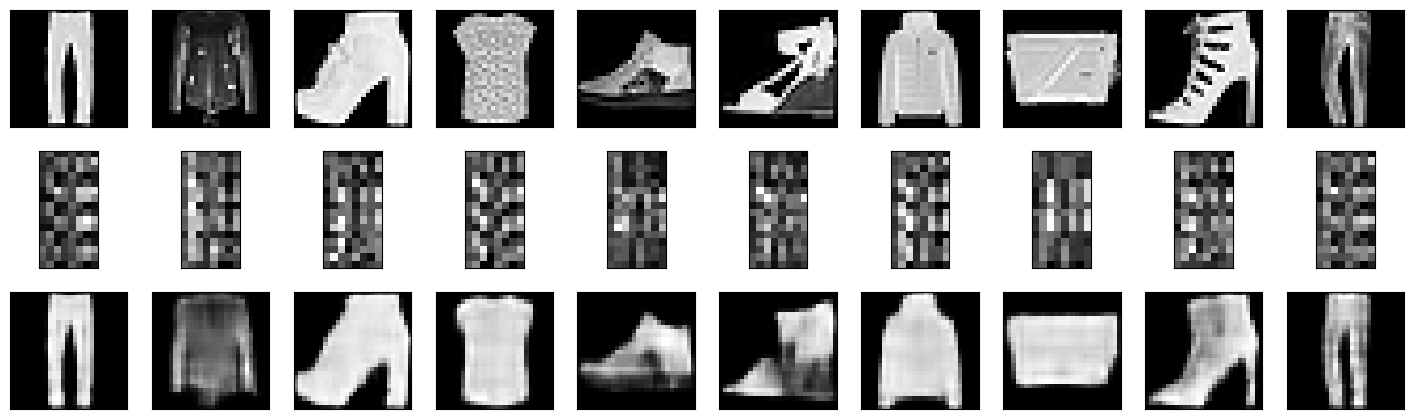

In [23]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10, i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())